In [1]:
using Plots
include("SurplusProduction.jl")
include("BaseParams.jl")

Main.BaseParams

In [28]:
Fmsy = BaseParams.Fmsy
MSY = BaseParams.MSY
model = SurplusProduction.init_pstar( 
            BaseParams.Fmsy, # fishing mortaltiy rate at maximum sustainable yield
            0.4,#BaseParams.pstar, # p-star
            BaseParams.tau, # process noise
            BaseParams.sigma_a, # active monitoring noise
            BaseParams.sigma_p, # passive monitoring noise
            BaseParams.H_weight, # harvets weight
            BaseParams.NCV_weight, # nonconsumptive values weight
            BaseParams.c1, # stock dependent costs 
            BaseParams.c2, # saturating / nonlinear costs
            BaseParams.b, # nonconsumptive values risk aversion 
            BaseParams.discount;
            MSY = 10,
            N = 200, # number of node
            CVmax = 1.5, # maximum uncertinaty
            Bmax = 3.5, # maximum biomass 
            Bmin = 0.001,
            Blimit = 0.25,
            Btarget = 1.0)

nothing


## Value function 

In [29]:
using Colors
using LaTeXStrings

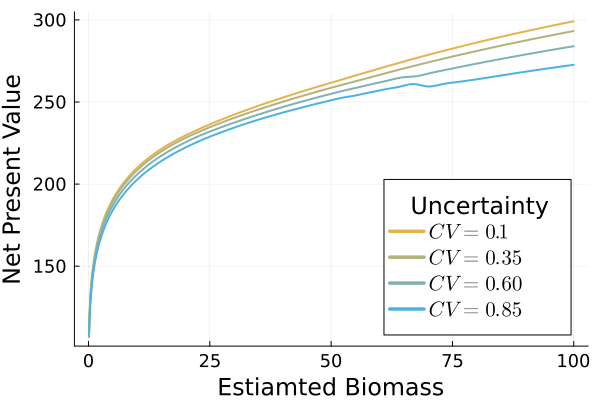

In [30]:
using Colors
using LaTeXStrings
Bhat = (0.1:(0.00125*2*BaseParams.MSY/BaseParams.Fmsy):(2*BaseParams.MSY/BaseParams.Fmsy))
CV = [0.1,0.35,0.6,0.85]
acc = zeros(length(Bhat),length(CV));n=0
for i in 1:length(Bhat)
    for j in 1:length(CV)
        n+=1;Var = log(CV[j]^2+1);mu = log(Bhat[i]) .- 0.5*Var 
        acc[i,j] = model.Value([mu,Var])
    end
end 

plt=Plots.plot(Bhat,acc[:,1],label = L"CV = 0.1",c = Colors.RGB(0.9,0.7,0.3), width = 2)
Plots.plot!(Bhat,acc[:,2],label = L"CV = 0.35",c = Colors.RGB(0.7,0.7,0.5), width = 2)
Plots.plot!(Bhat,acc[:,3],label = L"CV = 0.60",c = Colors.RGB(0.5,0.7,0.7), width = 2)
Plots.plot!(Bhat,acc[:,4],label = L"CV = 0.85",c = Colors.RGB(0.3,0.7,0.9), width = 2,
            ylabel = "Net Present Value", xlabel = "Estiamted Biomass",legendtitle = "Uncertainty",
            legendfontsize = 14,legendtitlefontsize = 16, legendposition = :bottomright,
            labelfontsize = 16, tickfontsize = 12)
savefig(plt,"data/NPV_pstar.png")
plt

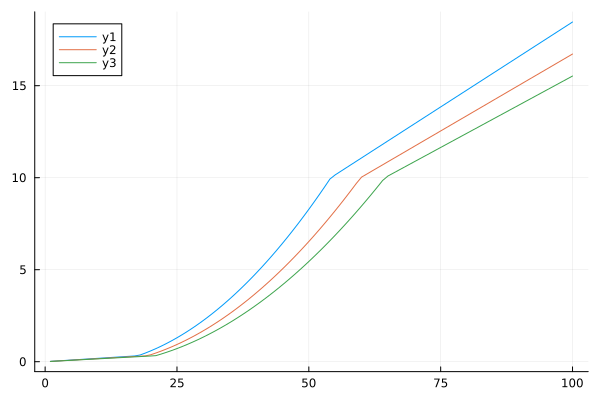

In [31]:
x = 1.0:100.0
Plots.plot(x, broadcast( x -> model.mod.fixed_control(([log(x)],[0.1;;])), x))
Plots.plot!(x, broadcast( x -> model.mod.fixed_control(([log(x)],[0.5;;])), x))
Plots.plot!(x, broadcast( x -> model.mod.fixed_control(([log(x)],[1.0;;])), x))

## Marignal value of monitoring 

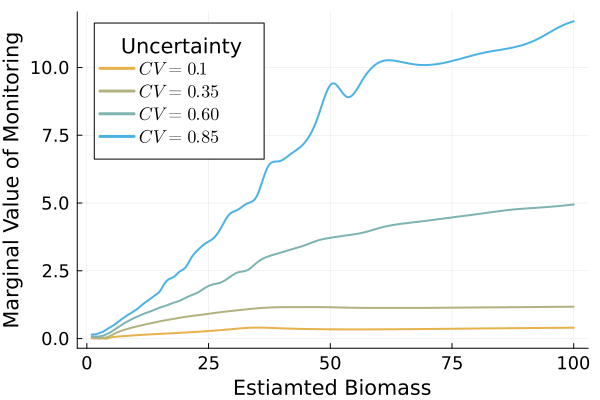

In [33]:
Bhat = (1:(0.00125*2*BaseParams.MSY/BaseParams.Fmsy):(2*BaseParams.MSY/BaseParams.Fmsy))
CV = [0.1,0.35,0.6,0.85]
acc = zeros(length(Bhat),length(CV));n=0
for i in 1:length(Bhat)
    for j in 1:length(CV)
        n+=1;Var = log(CV[j]^2+1);mu = log(Bhat[i]) .- 0.5*Var 
        acc[i,j] = model.VoI([mu,Var])
    end
end 

plt=Plots.plot(Bhat,acc[:,1],label = L"CV = 0.1",c = Colors.RGB(0.9,0.7,0.3), width = 2)
Plots.plot!(Bhat,acc[:,2],label = L"CV = 0.35",c = Colors.RGB(0.7,0.7,0.5), width = 2)
Plots.plot!(Bhat,acc[:,3],label = L"CV = 0.60",c = Colors.RGB(0.5,0.7,0.7), width = 2)
Plots.plot!(Bhat,acc[:,4],label = L"CV = 0.85",c = Colors.RGB(0.3,0.7,0.9), width = 2,
            ylabel = "Marginal Value of Monitoring", xlabel = "Estiamted Biomass",legendtitle = "Uncertainty",
            legendfontsize = 12,legendtitlefontsize = 14, legendposition = :topleft,
            labelfontsize = 14, tickfontsize = 12)
#savefig(plt,"data/marginal_VoI_pstar.png")
plt

# Marignal value (percentage)

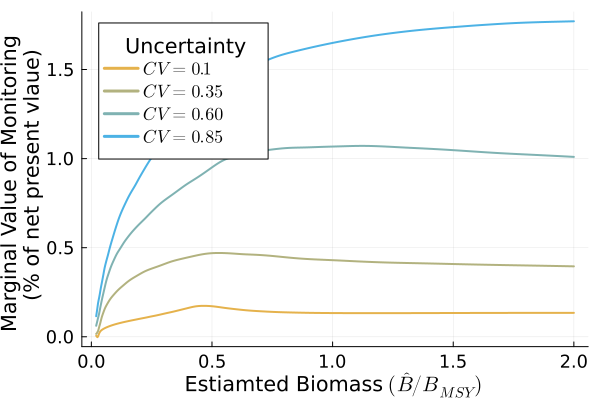

In [6]:
Bhat = (1:(0.00125*2*BaseParams.MSY/BaseParams.Fmsy):(2*BaseParams.MSY/BaseParams.Fmsy))
Bmsy = BaseParams.MSY/BaseParams.Fmsy
CV = [0.1,0.35,0.6,0.85]
acc = zeros(length(Bhat),length(CV));n=0
for i in 1:length(Bhat)
    for j in 1:length(CV)
        n+=1;Var = log(CV[j]^2+1);mu = log(Bhat[i]) .- 0.5*Var 
        acc[i,j] = 100*model.VoI([mu,Var]) / model.Value([mu,Var]) 
    end
end 

plt = Plots.plot(Bhat./Bmsy,acc[:,1],label = L"CV = 0.1",c = Colors.RGB(0.9,0.7,0.3), width = 2)
Plots.plot!(Bhat./Bmsy,acc[:,2],label = L"CV = 0.35",c = Colors.RGB(0.7,0.7,0.5), width = 2)
Plots.plot!(Bhat./Bmsy,acc[:,3],label = L"CV = 0.60",c = Colors.RGB(0.5,0.7,0.7), width = 2)
Plots.plot!(Bhat./Bmsy,acc[:,4],label = L"CV = 0.85",c = Colors.RGB(0.3,0.7,0.9), width = 2,
            ylabel = "Marginal Value of Monitoring \n (% of net present vlaue)", 
            xlabel = string("Estiamted Biomass ", L"(\hat{B}/B_{MSY})"),legendtitle = "Uncertainty",
            legendfontsize = 12,legendtitlefontsize = 14, legendposition = :topleft,
            labelfontsize = 14, tickfontsize = 12)
savefig(plt,"data/marginal_VoI_percentage_pstar.png")
plt

## Marginal (anuity)

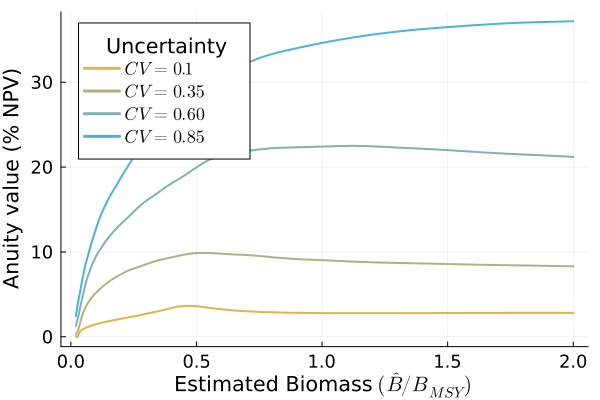

In [14]:
using LaTeXStrings
Bhat = (1:(0.00125*2*BaseParams.MSY/BaseParams.Fmsy):(2*BaseParams.MSY/BaseParams.Fmsy))
Bmsy = BaseParams.MSY/BaseParams.Fmsy
CV = [0.1,0.35,0.6,0.85]
acc = zeros(length(Bhat),length(CV));n=0
for i in 1:length(Bhat)
    for j in 1:length(CV)
        n+=1;Var = log(CV[j]^2+1);mu = log(Bhat[i]) .- 0.5*Var 
        acc[i,j] = 100*model.VoI([mu,Var])*(1+1/BaseParams.discount)./model.Value([mu,Var])
    end
end 

plt = Plots.plot(Bhat./Bmsy,acc[:,1],label = L"CV = 0.1",c = Colors.RGB(0.9,0.7,0.3), width = 2)
Plots.plot!(Bhat./Bmsy,acc[:,2],label = L"CV = 0.35",c = Colors.RGB(0.7,0.7,0.5), width = 2)
Plots.plot!(Bhat./Bmsy,acc[:,3],label = L"CV = 0.60",c = Colors.RGB(0.5,0.7,0.7), width = 2)
Plots.plot!(Bhat./Bmsy,acc[:,4],label = L"CV = 0.85",c = Colors.RGB(0.3,0.7,0.9), width = 2,
            ylabel = "Anuity value (% NPV)", 
            xlabel = string("Estimated Biomass ", L"(\hat{B}/B_{MSY})"),legendtitle = "Uncertainty",
            legendfontsize = 12,legendtitlefontsize = 14, legendposition = :topleft,
            labelfontsize = 14, tickfontsize = 12)
savefig(plt,"data/marginal_anuity_VoI_percentage_pstar.png")
plt

## Total value of monitoring

In [10]:
model_no_montoring=SurplusProduction.init_pstar( 
            BaseParams.Fmsy, # fishing mortaltiy rate at maximum sustainable yield
            0.4,#BaseParams.pstar, # p-star
            BaseParams.tau, # process noise
            BaseParams.sigma_a, # active monitoring noise
            BaseParams.sigma_p, # passive monitoring noise
            BaseParams.H_weight, # harvets weight
            BaseParams.NCV_weight, # nonconsumptive values weight
            BaseParams.c1, # stock dependent costs 
            BaseParams.c2, # saturating / nonlinear costs
            BaseParams.b, # nonconsumptive values risk aversion 
            BaseParams.discount;MSY = 10,actions = [1],
            N = 100, # number of node
            CVmax = 1.5, # maximum uncertinaty
            Bmax = 3.0, # maximum biomass 
            Bmin = 0.05,
            Blimit = 0.25,
            Btarget = 1.0)

nothing


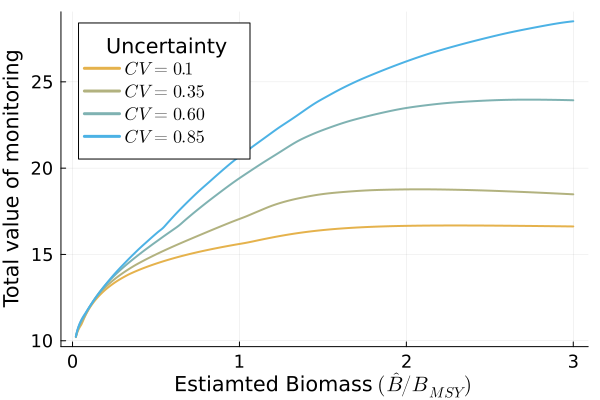

In [11]:

Bhat = (1:(0.00125*2*BaseParams.MSY/BaseParams.Fmsy):(3*BaseParams.MSY/BaseParams.Fmsy))
Bmsy = BaseParams.MSY/BaseParams.Fmsy
CV = [0.1,0.35,0.6,0.85]
acc = zeros(length(Bhat),length(CV));n=0
for i in 1:length(Bhat)
    for j in 1:length(CV)
        n+=1;Var = log(CV[j]^2+1);mu = log(Bhat[i]) .- 0.5*Var 
        acc[i,j] = model.Value([mu,Var]) - model_no_montoring.Value([mu,Var])
    end
end 

plt=Plots.plot(Bhat./Bmsy,acc[:,1],label = L"CV = 0.1",c = Colors.RGB(0.9,0.7,0.3), width = 2)
Plots.plot!(Bhat./Bmsy,acc[:,2],label = L"CV = 0.35",c = Colors.RGB(0.7,0.7,0.5), width = 2)
Plots.plot!(Bhat./Bmsy,acc[:,3],label = L"CV = 0.60",c = Colors.RGB(0.5,0.7,0.7), width = 2)
Plots.plot!(Bhat./Bmsy,acc[:,4],label = L"CV = 0.85",c = Colors.RGB(0.3,0.7,0.9), width = 2,
            ylabel = "Total value of monitoring", xlabel = string("Estiamted Biomass ", L"(\hat{B}/B_{MSY})"),
            legendtitle = "Uncertainty",
            legendfontsize = 12,legendtitlefontsize = 14, legendposition = :topleft,
            labelfontsize = 14, tickfontsize = 12)
savefig(plt,"data/total_VoI.png")
plt

# Total value percentage of total 

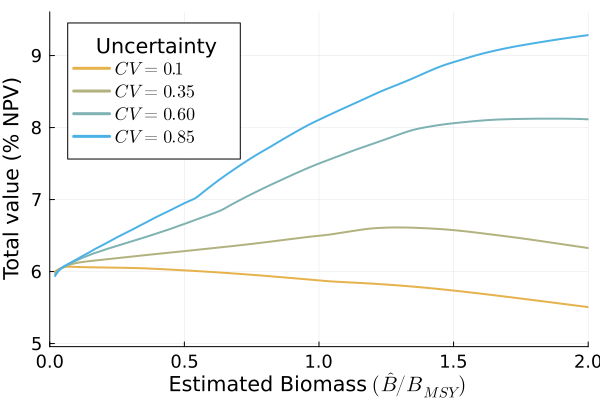

In [17]:
Bhat = (1:(0.00125*2*BaseParams.MSY/BaseParams.Fmsy):(3*BaseParams.MSY/BaseParams.Fmsy))
Bmsy = BaseParams.MSY/BaseParams.Fmsy
CV = [0.1,0.35,0.6,0.85]
acc = zeros(length(Bhat),length(CV));n=0
for i in 1:length(Bhat)
    for j in 1:length(CV)
        n+=1;Var = log(CV[j]^2+1);mu = log(Bhat[i]) .- 0.5*Var 
        acc[i,j] = 100*(model.Value([mu,Var]) - model_no_montoring.Value([mu,Var]))/model.Value([mu,Var])
    end
end 

plt = Plots.plot(Bhat./Bmsy,acc[:,1],label = L"CV = 0.1",c = Colors.RGB(0.9,0.7,0.3), width = 2)
Plots.plot!(Bhat./Bmsy,acc[:,2],label = L"CV = 0.35",c = Colors.RGB(0.7,0.7,0.5), width = 2)
Plots.plot!(Bhat./Bmsy,acc[:,3],label = L"CV = 0.60",c = Colors.RGB(0.5,0.7,0.7), width = 2)
Plots.plot!(Bhat./Bmsy,acc[:,4],label = L"CV = 0.85",c = Colors.RGB(0.3,0.7,0.9), width = 2,
            ylabel = "Total value (% NPV)", 
            xlabel = string("Estimated Biomass ", L"(\hat{B}/B_{MSY})"),legendtitle = "Uncertainty",
            legendfontsize = 12,legendtitlefontsize = 14, legendposition = :topleft, labelfontsize = 14, tickfontsize = 12,
            xlims = (0,2))
savefig(plt,"data/total_VoI_precent_pstar.png")
plt

# Fishery values only 

In [206]:
Fmsy = BaseParams.Fmsy
MSY = BaseParams.MSY

model_H_only=SurplusProduction.init_simpler( 
                BaseParams.Fmsy, # fishing mortaltiy rate at maximum sustainable yield
                BaseParams.buffer, # p-star
                BaseParams.tau, # process noice
                BaseParams.sigma_a, # active monitoring noise
                BaseParams.sigma_p, # passive monitoring noise
                BaseParams.H_weight, # harvets weight
                0.0*BaseParams.NCV_weight, # nonconsumptive values weight
                BaseParams.c1, # stock dependent costs 
                BaseParams.c2, # saturating / nonlinear costs
                BaseParams.b, # nonconsumptive values risk aversion 
                BaseParams.discount;
                mQuad = 20,N =50,CVmax = 1.5,
                Bmax = 3.5,Bmin = 0.05,threashold = 10^-5.0)

print(" ")

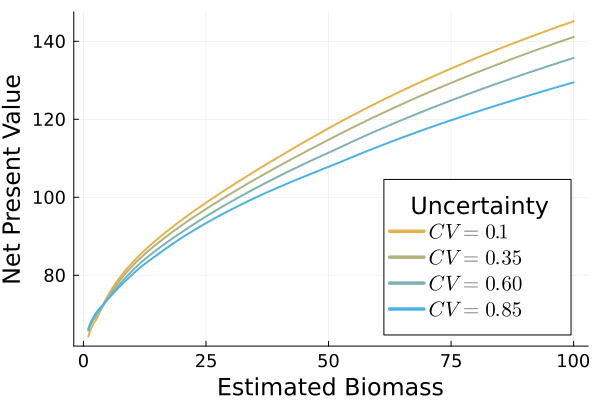

In [207]:
Bhat = (1:(0.00125*2*BaseParams.MSY/BaseParams.Fmsy):(2*BaseParams.MSY/BaseParams.Fmsy))
CV = [0.1,0.35,0.6,0.85]
acc = zeros(length(Bhat),length(CV));n=0
for i in 1:length(Bhat)
    for j in 1:length(CV)
        n+=1;Var = log(CV[j]^2+1);mu = log(Bhat[i]) .- 0.5*Var 
        acc[i,j] = model_H_only.Value([mu,Var])
    end
end 

plt = Plots.plot(Bhat,acc[:,1],label = L"CV = 0.1",c = Colors.RGB(0.9,0.7,0.3), width = 2)
Plots.plot!(Bhat,acc[:,2],label = L"CV = 0.35",c = Colors.RGB(0.7,0.7,0.5), width = 2)
Plots.plot!(Bhat,acc[:,3],label = L"CV = 0.60",c = Colors.RGB(0.5,0.7,0.7), width = 2)
Plots.plot!(Bhat,acc[:,4],label = L"CV = 0.85",c = Colors.RGB(0.3,0.7,0.9), width = 2,
            ylabel = "Net Present Value", xlabel = "Estimated Biomass",legendtitle = "Uncertainty",
            legendfontsize = 14,legendtitlefontsize = 16, legendposition = :bottomright,
            labelfontsize = 16, tickfontsize = 12)
savefig(plt,"data/NPV_H_only.png")
plt

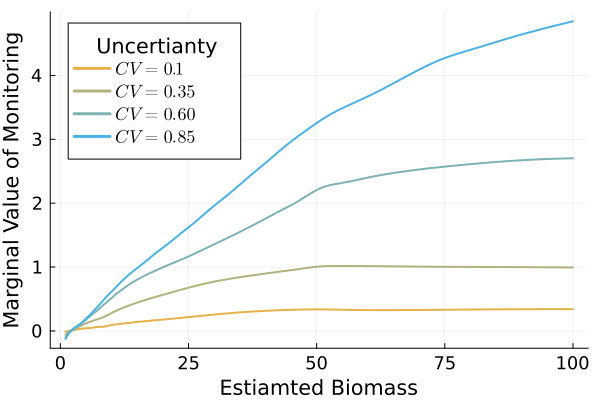

In [208]:
Bhat = (1:(0.00125*2*BaseParams.MSY/BaseParams.Fmsy):(2*BaseParams.MSY/BaseParams.Fmsy))
CV = [0.1,0.35,0.6,0.85]
acc = zeros(length(Bhat),length(CV));n=0
for i in 1:length(Bhat)
    for j in 1:length(CV)
        n+=1;Var = log(CV[j]^2+1);mu = log(Bhat[i]) .- 0.5*Var 
        acc[i,j] = model_H_only.VoI([mu,Var])
    end
end 

plt = Plots.plot(Bhat,acc[:,1],label = L"CV = 0.1",c = Colors.RGB(0.9,0.7,0.3), width = 2)
Plots.plot!(Bhat,acc[:,2],label = L"CV = 0.35",c = Colors.RGB(0.7,0.7,0.5), width = 2)
Plots.plot!(Bhat,acc[:,3],label = L"CV = 0.60",c = Colors.RGB(0.5,0.7,0.7), width = 2)
Plots.plot!(Bhat,acc[:,4],label = L"CV = 0.85",c = Colors.RGB(0.3,0.7,0.9), width = 2,
            ylabel = "Marginal Value of Monitoring", xlabel = "Estiamted Biomass",legendtitle = "Uncertianty",
            legendfontsize = 12,legendtitlefontsize = 14, legendposition = :topleft,
            labelfontsize = 14, tickfontsize = 12)
savefig(plt,"data/marginal_VoI_H_only.png")
plt

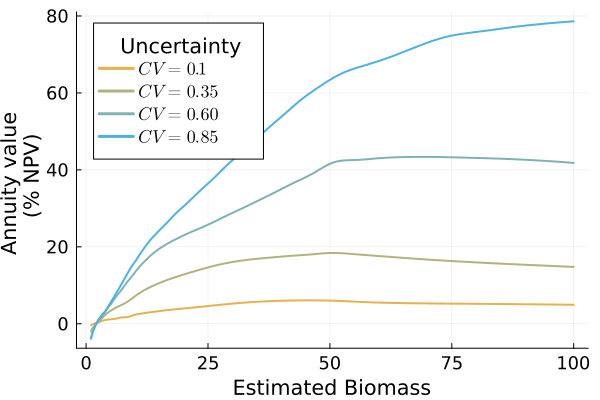

In [209]:
Bhat = (1:(0.00125*2*BaseParams.MSY/BaseParams.Fmsy):(2*BaseParams.MSY/BaseParams.Fmsy))
CV = [0.1,0.35,0.6,0.85]
acc = zeros(length(Bhat),length(CV));n=0
for i in 1:length(Bhat)
    for j in 1:length(CV)
        n+=1;Var = log(CV[j]^2+1);mu = log(Bhat[i]) .- 0.5*Var 
        acc[i,j] = 100*model_H_only.VoI([mu,Var]).*(1+1/BaseParams.discount) / model_H_only.Value([mu,Var]) 
    end
end 

plt = Plots.plot(Bhat,acc[:,1],label = L"CV = 0.1",c = Colors.RGB(0.9,0.7,0.3), width = 2)
Plots.plot!(Bhat,acc[:,2],label = L"CV = 0.35",c = Colors.RGB(0.7,0.7,0.5), width = 2)
Plots.plot!(Bhat,acc[:,3],label = L"CV = 0.60",c = Colors.RGB(0.5,0.7,0.7), width = 2)
Plots.plot!(Bhat,acc[:,4],label = L"CV = 0.85",c = Colors.RGB(0.3,0.7,0.9), width = 2,
            ylabel = "Annuity value \n (% NPV)", xlabel = "Estimated Biomass",
            legendtitle = "Uncertainty",
            legendfontsize = 12,legendtitlefontsize = 14, legendposition = :topleft,
            labelfontsize = 14, tickfontsize = 12)
savefig(plt,"data/marginal_VoI_percentage_H_only.png")
plt

# Total value harvest values only 

In [174]:
model_no_montoring_H_only=SurplusProduction.init_simpler( 
                BaseParams.Fmsy, # fishing mortaltiy rate at maximum sustainable yield
                BaseParams.buffer, # p-star
                BaseParams.tau, # process noice
                BaseParams.sigma_a, # active monitoring noise
                BaseParams.sigma_p, # passive monitoring noise
                BaseParams.H_weight, # harvets weight
                0.0*BaseParams.NCV_weight, # nonconsumptive values weight
                BaseParams.c1, # stock dependent costs 
                BaseParams.c2, # saturating / nonlinear costs
                BaseParams.b, # nonconsumptive values risk aversion 
                BaseParams.discount;
                mQuad = 20,N =70,CVmax = 1.75,actions = [1],
                Bmax = 3.5,Bmin = 0.05,threashold = 10^-5)

nothing

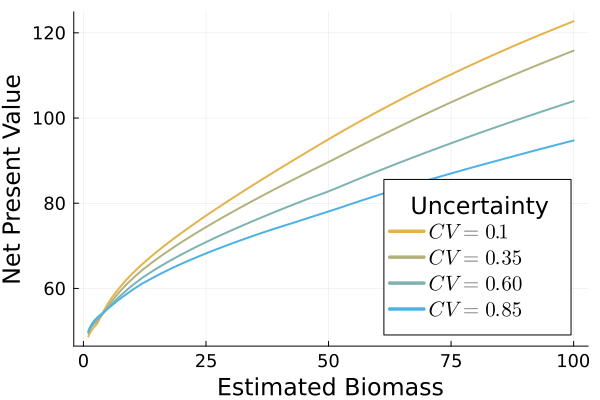

In [175]:
Bhat = (1:(0.00125*2*BaseParams.MSY/BaseParams.Fmsy):(2*BaseParams.MSY/BaseParams.Fmsy))
CV = [0.1,0.35,0.6,0.85]
acc = zeros(length(Bhat),length(CV));n=0
for i in 1:length(Bhat)
    for j in 1:length(CV)
        n+=1;Var = log(CV[j]^2+1);mu = log(Bhat[i]) .- 0.5*Var 
        acc[i,j] = model_no_montoring_H_only.Value([mu,Var])
    end
end 

plt = Plots.plot(Bhat,acc[:,1],label = L"CV = 0.1",c = Colors.RGB(0.9,0.7,0.3), width = 2)
Plots.plot!(Bhat,acc[:,2],label = L"CV = 0.35",c = Colors.RGB(0.7,0.7,0.5), width = 2)
Plots.plot!(Bhat,acc[:,3],label = L"CV = 0.60",c = Colors.RGB(0.5,0.7,0.7), width = 2)
Plots.plot!(Bhat,acc[:,4],label = L"CV = 0.85",c = Colors.RGB(0.3,0.7,0.9), width = 2,
            ylabel = "Net Present Value", xlabel = "Estimated Biomass",legendtitle = "Uncertainty",
            legendfontsize = 14,legendtitlefontsize = 16, legendposition = :bottomright,
            labelfontsize = 16, tickfontsize = 12)

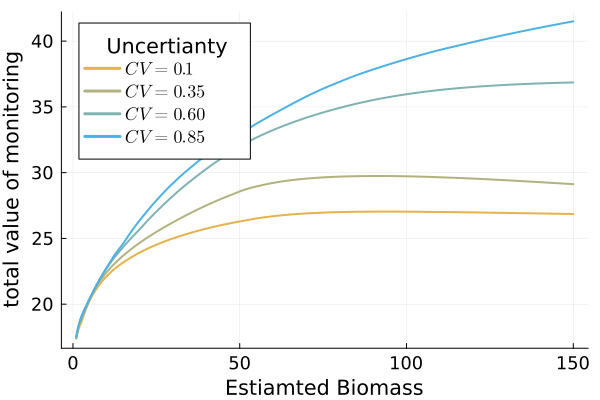

In [176]:
Bhat = (1:(0.00125*2*BaseParams.MSY/BaseParams.Fmsy):(3*BaseParams.MSY/BaseParams.Fmsy))
CV = [0.1,0.35,0.6,0.85]
acc = zeros(length(Bhat),length(CV));n=0
for i in 1:length(Bhat)
    for j in 1:length(CV)
        n+=1;Var = log(CV[j]^2+1);mu = log(Bhat[i]) .- 0.5*Var 
        Val = model_H_only.Value([mu,Var]) - model_no_montoring_H_only.Value([mu,Var])
        acc[i,j] = model_H_only.Value([mu,Var]) - model_no_montoring_H_only.Value([mu,Var])
    end
end 

plt=Plots.plot(Bhat,acc[:,1],label = L"CV = 0.1",c = Colors.RGB(0.9,0.7,0.3), width = 2)
Plots.plot!(Bhat,acc[:,2],label = L"CV = 0.35",c = Colors.RGB(0.7,0.7,0.5), width = 2)
Plots.plot!(Bhat,acc[:,3],label = L"CV = 0.60",c = Colors.RGB(0.5,0.7,0.7), width = 2)
Plots.plot!(Bhat,acc[:,4],label = L"CV = 0.85",c = Colors.RGB(0.3,0.7,0.9), width = 2,
            ylabel = "total value of monitoring", xlabel = "Estiamted Biomass",legendtitle = "Uncertianty",
            legendfontsize = 12,legendtitlefontsize = 14, legendposition = :topleft,
            labelfontsize = 14, tickfontsize = 12)
savefig(plt,"data/total_VoI_H_only.png")
plt

# Total value as a percentage Harvest only 

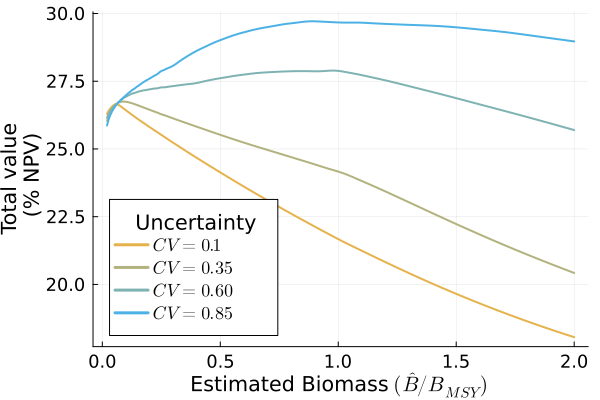

In [177]:
Bhat = (1:(0.00125*2*BaseParams.MSY/BaseParams.Fmsy):(2*BaseParams.MSY/BaseParams.Fmsy))
CV = [0.1,0.35,0.6,0.85]
acc = zeros(length(Bhat),length(CV));n=0
for i in 1:length(Bhat)
    for j in 1:length(CV)
        n+=1;Var = log(CV[j]^2+1);mu = log(Bhat[i]) .- 0.5*Var 
        acc[i,j] = 100*(model_H_only.Value([mu,Var]) - model_no_montoring_H_only.Value([mu,Var]))/model_H_only.Value([mu,Var])
    end
end 
BMSY = BaseParams.MSY/BaseParams.Fmsy
plt=Plots.plot(Bhat./BMSY,acc[:,1],label = L"CV = 0.1",c = Colors.RGB(0.9,0.7,0.3), width = 2)
Plots.plot!(Bhat./BMSY,acc[:,2],label = L"CV = 0.35",c = Colors.RGB(0.7,0.7,0.5), width = 2)
Plots.plot!(Bhat./BMSY,acc[:,3],label = L"CV = 0.60",c = Colors.RGB(0.5,0.7,0.7), width = 2)
Plots.plot!(Bhat./BMSY,acc[:,4],label = L"CV = 0.85",c = Colors.RGB(0.3,0.7,0.9), width = 2,
            ylabel = "Total value\n (% NPV)", 
            xlabel = string("Estimated Biomass ", L"(\hat{B}/B_{MSY})"),
            legendtitle = "Uncertainty",
            legendfontsize = 12,legendtitlefontsize = 14, legendposition = :bottomleft,
            labelfontsize = 14, tickfontsize = 12)
savefig(plt,"data/total_VoI_precentage_H_only.png")
plt

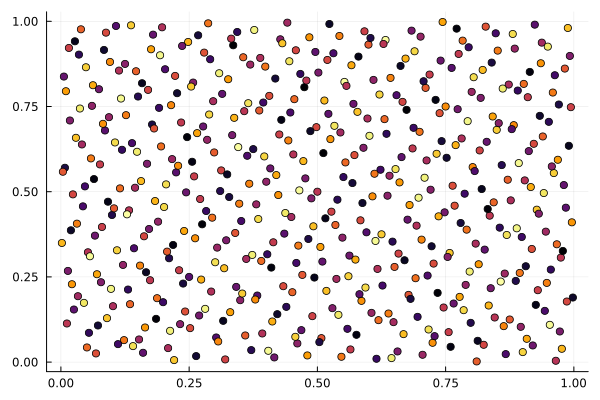

In [159]:
using Sobol, Plots
N = 11
s = Sobol.SobolSeq(N)
T = 2^9
x1 = zeros(T);x2 = zeros(T);x3 = zeros(T);x4 = zeros(T)
for i in 1:T
    x = next!(s)
    x1[i] = x[5]
    x2[i] = x[10]
    x3[i] = x[6]
end 
Plots.scatter(x1,x2,zcolor=x3, legend = false)

In [96]:
2^10

1024

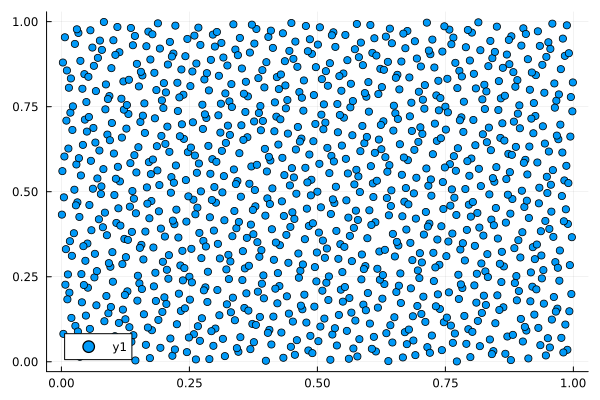

In [180]:
using Plots



In [272]:
include("surplus_production_VoI.jl")

In [278]:
2^12 * 2^7

524288

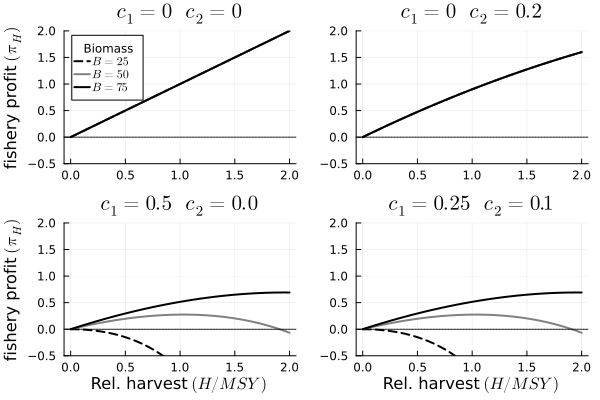

In [237]:
using Plots
using LaTeXStrings
include("SurplusProduction.jl")

x = [log(50)]
observation = 1
harvest = 10
H_weight = 1.0
NCV_weight = 0.0
c1 = 0.0
c2 = 0.0
NCVshape =0.2
monitoring_cost = 0.0
MSY = 10
Fmsy = 0.2

Harvest = 0.0:0.1:20
values_B25 = broadcast(H -> SurplusProduction.objective_function([log(25)],observation,H,H_weight, NCV_weight, c1,c2, 
                        NCVshape, monitoring_cost,MSY, Fmsy ), Harvest)
values_B50 = broadcast(H -> SurplusProduction.objective_function([log(50)],observation,H,H_weight, NCV_weight, c1,c2, 
                        NCVshape, monitoring_cost,MSY, Fmsy ), Harvest)
values_B75 = broadcast(H -> SurplusProduction.objective_function([log(75)],observation,H,H_weight, NCV_weight, c1,c2, 
                        NCVshape, monitoring_cost,MSY, Fmsy ), Harvest)
p1 = Plots.plot(Harvest./10,values_B25, color = "black", linestyle = :dash, width = 2,label = L"B = 25")
Plots.plot!(Harvest./10,values_B50, color = "grey", width = 2,label = L"B = 50")
Plots.plot!(Harvest./10,values_B75, ylim = [-0.5,2], color = "black", width = 2,label = L"B = 75",
            ylabel = string("fishery profit ", L"(\pi_{H})"), legendtitle = "Biomass", legendtitlefontsize = 8,
            title = string(L"c_1 = 0", "  ", L"c_2 = 0"))
hline!([0.0],c = "black",linestyle = :dot,label = "")

c2 = 0.1
c1 = 0.0
values_B25 = broadcast(H -> SurplusProduction.objective_function([log(25)],observation,H,H_weight, NCV_weight, c1,c2, 
                        NCVshape, monitoring_cost,MSY, Fmsy ), Harvest)
values_B50 = broadcast(H -> SurplusProduction.objective_function([log(50)],observation,H,H_weight, NCV_weight, c1,c2, 
                        NCVshape, monitoring_cost,MSY, Fmsy ), Harvest)
values_B75 = broadcast(H -> SurplusProduction.objective_function([log(75)],observation,H,H_weight, NCV_weight, c1,c2, 
                        NCVshape, monitoring_cost,MSY, Fmsy ), Harvest)
p2 = Plots.plot(Harvest./10,values_B25, color = "black", linestyle = :dash, width = 2)
Plots.plot!(Harvest./10,values_B50, color = "grey", width = 2)
Plots.plot!(Harvest./10,values_B75, ylim = [-0.5,2], color = "black", width = 2, legend = false, 
            title = string(L"c_1 = 0", "  ", L"c_2 = 0.2"))
hline!([0.0],c = "black",linestyle = :dot,label = "")

c1 = 0.5
values_B25 = broadcast(H -> SurplusProduction.objective_function([log(25)],observation,H,H_weight, NCV_weight, c1,c2, 
                        NCVshape, monitoring_cost,MSY, Fmsy ), Harvest)
values_B50 = broadcast(H -> SurplusProduction.objective_function([log(50)],observation,H,H_weight, NCV_weight, c1,c2, 
                        NCVshape, monitoring_cost,MSY, Fmsy ), Harvest)
values_B75 = broadcast(H -> SurplusProduction.objective_function([log(75)],observation,H,H_weight, NCV_weight, c1,c2, 
                        NCVshape, monitoring_cost,MSY, Fmsy ), Harvest)
p3 = Plots.plot(Harvest./10,values_B25, color = "black", linestyle = :dash, width = 2)
Plots.plot!(Harvest./10,values_B50, color = "grey",width = 2)
Plots.plot!(Harvest./10,values_B75, ylim = [-0.5,2], color = "black", width = 2, legend = false,
            ylabel = string("fishery profit ", L"(\pi_{H})"), xlabel = string("Rel. harvest ", L"(H/MSY)"),
            title = string(L"c_1 = 0.5", "  ", L"c_2 = 0.0"))
hline!([0.0],c = "black",linestyle = :dot,label = "")


c2 = 0.1
c1 = 0.5
values_B25 = broadcast(H -> SurplusProduction.objective_function([log(25)],observation,H,H_weight, NCV_weight, c1,c2, 
                        NCVshape, monitoring_cost,MSY, Fmsy ), Harvest)
values_B50 = broadcast(H -> SurplusProduction.objective_function([log(50)],observation,H,H_weight, NCV_weight, c1,c2, 
                        NCVshape, monitoring_cost,MSY, Fmsy ), Harvest)
values_B75 = broadcast(H -> SurplusProduction.objective_function([log(75)],observation,H,H_weight, NCV_weight, c1,c2, 
                        NCVshape, monitoring_cost,MSY, Fmsy ), Harvest)
p4 = Plots.plot(Harvest./10,values_B25, color = "black", linestyle = :dash, width = 2)
Plots.plot!(Harvest./10,values_B50, color = "grey", width = 2)
Plots.plot!(Harvest./10,values_B75, ylim = [-0.5,2], color = "black", width = 2, legend = false,
            xlabel = string("Rel. harvest ", L"(H/MSY)"), title = string(L"c_1 = 0.25", "  ", L"c_2 = 0.1"))
hline!([0.0],c = "black",linestyle = :dot,label = "")
plot(p1,p2,p3,p4)

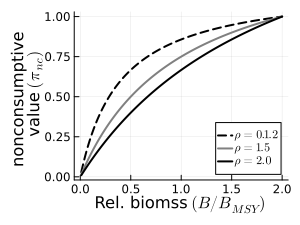

In [239]:
using Plots
using LaTeXStrings
include("SurplusProduction.jl")

x = [log(50)]
observation = 1
harvest = 0.0
H_weight = 1.0
NCV_weight = 1.0
c1 = 0.0
c2 = 0.0
NCVshape =0.5
monitoring_cost = 0.0
MSY = 10
Fmsy = 0.2

Biomass = 0.0:0.01:2
values_b11 = broadcast(B -> SurplusProduction.objective_function([log(B*MSY/Fmsy)],observation,0.0,H_weight, NCV_weight, c1,c2, 
                        1.2, monitoring_cost,MSY, Fmsy ), Biomass)
values_b12 = broadcast(B -> SurplusProduction.objective_function([log(B*MSY/Fmsy)],observation,0.0,H_weight, NCV_weight, c1,c2, 
                        1.5, monitoring_cost,MSY, Fmsy ), Biomass)
values_b13 = broadcast(B -> SurplusProduction.objective_function([log(B*MSY/Fmsy)],observation,0.0,H_weight, NCV_weight, c1,c2, 
                        2.0, monitoring_cost,MSY, Fmsy ), Biomass)
p5 = Plots.plot(Biomass,values_b11, color = "black", linestyle = :dash, width = 2,label = L"\rho = 0.1.2")
Plots.plot!(Biomass,values_b12, color = "grey", width = 2,label = L"\rho = 1.5")
Plots.plot!(Biomass,values_b13, color = "black",width = 2,label = L"\rho = 2.0",
            ylabel = string("nonconsumptive \n value " ,L"(\pi_{nc})"), xlabel = string("Rel. biomss " ,L"(B/B_{MSY})"))
plot(p5,size = (300,225))

In [384]:
include("surplus_production_objective_plots.jl")

"/Users/johnbuckner/github/KalmanFilterPOMDPs/examples/figures/nonconsumptive_objective.png"

In [ ]:
include("SurplusProduction.jl")
Fmsy = 0.2
pstar = 0.4
tau = 0.05
sigma_a = 0.2
sigma_p = 2.0
H_weight = 10
NCV_weight = 10
c1 = 0.1
c2 = 1.2
b = 1.2
discount = 0.05
MSY = 10.0

model=SurplusProduction.init( 
        Fmsy, # fishing mortaltiy rate at maximum sustainable yield
        pstar, # p-star
        tau, # process noice
        sigma_a, # active monitoring noise
        sigma_p, # passive monitoring noise
        H_weight, # harvets weight
        NCV_weight, # nonconsumptive values weight
        c1, # stock dependent costs 
        c2, # saturating / nonlinear costs
        b, # nonconsumptive values risk aversion 
        discount;
        MSY = 10,
        monitoring_costs = 1.0)

In [ ]:
include("SurplusProduction.jl")
include("../src/ParticleFilters.jl")
include("../src/BeliefStateTransitions.jl")
include("BaseParams.jl")
using Distributions

println(Threads.nthreads())


model=SurplusProduction.init( 
                BaseParams.Fmsy, # fishing mortaltiy rate at maximum sustainable yield
                BaseParams.pstar, # p-star
                BaseParams.tau, # process noice
                BaseParams.sigma_a, # active monitoring noise
                BaseParams.sigma_p, # passive monitoring noise
                BaseParams.H_weight, # harvets weight
                BaseParams.NCV_weight, # nonconsumptive values weight
                BaseParams.c1, # stock dependent costs 
                BaseParams.c2, # saturating / nonlinear costs
                BaseParams.b, # nonconsumptive values risk aversion 
                BaseParams.discount;
                MSY = BaseParams.MSY,
                monitoring_costs = BaseParams.monitoring_costs,
                N =50)

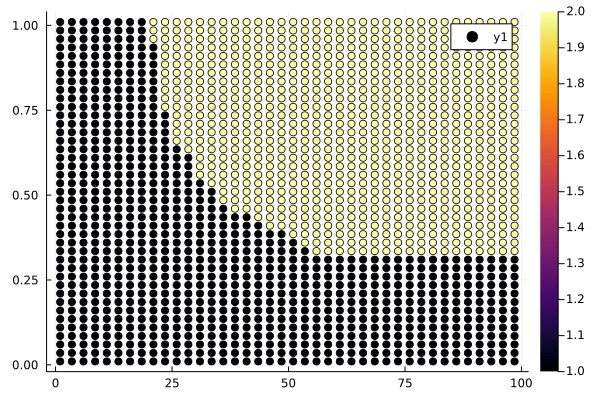

In [36]:
using Plots
Bhat = (1:(0.025*2*BaseParams.MSY/BaseParams.Fmsy):(2*BaseParams.MSY/BaseParams.Fmsy))
CV = 0.01:0.025:1.01

acc = zeros(length(Bhat)*length(CV),3)
n=0
for i in 1:length(Bhat)
    for j in 1:length(CV)
        n+=1
        Var = log(CV[j]^2+1)
        mu = log(Bhat[i]) - 0.5*Var 
        acc[n,:] = [Bhat[i],CV[j],model.Policy([mu,Var])]
    end
end 

Plots.scatter(acc[:,1],acc[:,2],zcolor=acc[:,3])

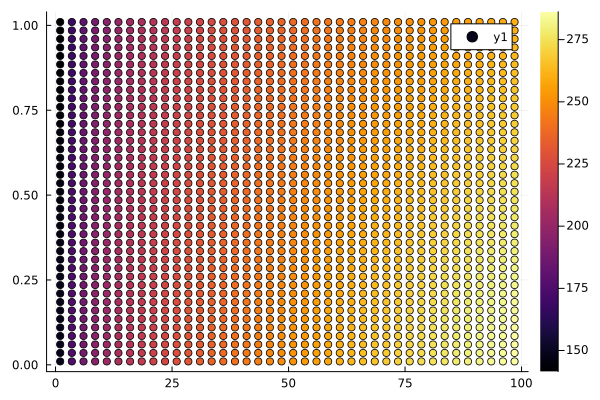

In [37]:
using Plots
Bhat = (1:(0.025*2*BaseParams.MSY/BaseParams.Fmsy):(2*BaseParams.MSY/BaseParams.Fmsy))
CV = 0.01:0.025:1.01

acc = zeros(length(Bhat)*length(CV),3)
n=0
for i in 1:length(Bhat)
    for j in 1:length(CV)
        n+=1
        Var = log(CV[j]^2+1)
        mu = log(Bhat[i]) - 0.5*Var 
        acc[n,:] = [Bhat[i],CV[j],model.Value([mu,Var])]
    end
end 

Plots.scatter(acc[:,1],acc[:,2],zcolor=acc[:,3])

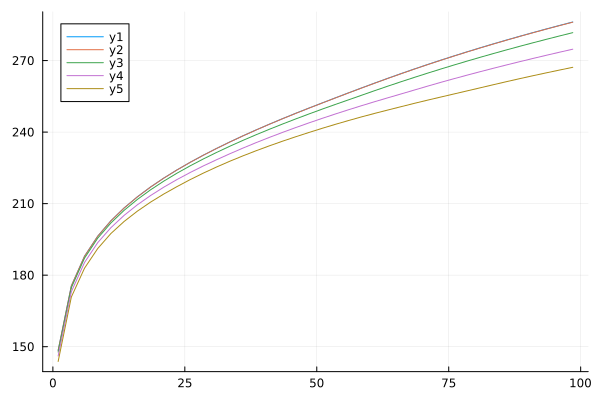

In [39]:
Bhat = [acc[i*length(CV)+1,1] for i in 0:(length(Bhat )-1)]
VoI = [acc[i*length(CV)+1,3] for i in 0:(length(Bhat )-1)]
p1 = Plots.plot(Bhat, VoI)

for j in 2:10:length(CV)
    Bhat = [acc[i*length(CV)+j,1] for i in 0:(length(Bhat )-1)]
    VoI = [acc[i*length(CV)+j,3] for i in 0:(length(Bhat )-1)]
    Plots.plot!(p1,Bhat, VoI)
end 
p1

In [55]:
using JLD2
test_policy  = load_object("data/test_policy.jld2")
Bhat = (1:(0.025*2*BaseParams.MSY/BaseParams.Fmsy):(2*BaseParams.MSY/BaseParams.Fmsy))
CV = 0.01:0.025:1.01

acc = zeros(length(Bhat)*length(CV),3)
n=0
for i in 1:length(Bhat)
    for j in 1:length(CV)
        n+=1
        Var = log(CV[j]^2+1)
        mu = log(Bhat[i]) - 0.5*Var 
        acc[n,:] = [Bhat[i],CV[j],test_policy([mu,Var])]
    end
end 

Plots.scatter(acc[:,1],acc[:,2],zcolor=acc[:,3])

LoadError: MethodError: no method matching +(::Vector{Float64}, ::Int64)
For element-wise addition, use broadcasting with dot syntax: array .+ scalar
[0mClosest candidates are:
[0m  +(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m) at /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/base/operators.jl:655
[0m  +([91m::T[39m, ::T) where T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8} at /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/base/int.jl:87
[0m  +([91m::Base.TwicePrecision[39m, ::Number) at /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/base/twiceprecision.jl:279
[0m  ...

In [51]:
test_policy  = load_object("data/base_model_test_policy.jld2")

#1 (generic function with 1 method)

In [71]:
test_policy(10)

0.0

In [57]:
test_policy

#15 (generic function with 1 method)

In [189]:
include("objective_function_plots.jl")

"/Users/johnbuckner/github/KalmanFilterPOMDPs/examples/figures/base_objective_function.png"

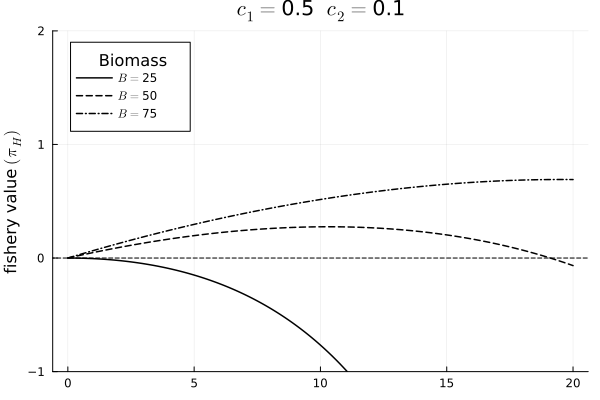

In [116]:
plot_Harvest_values([25,50,75],0.5,0.1)

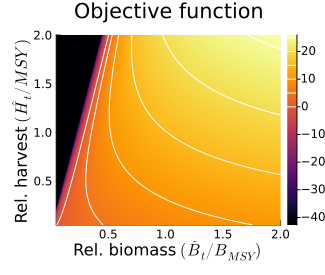

In [245]:
MSY = BaseParams.MSY
Fmsy = BaseParams.Fmsy
observation = 1.0
NCV_weight = BaseParams.NCV_weight
H_weight = BaseParams.H_weight
c1 = BaseParams.c1
c2 = BaseParams.c2
b = BaseParams.b
monitoring_cost = 0.0

f(x, y) = SurplusProduction.objective_function([log(x*MSY/Fmsy)],observation,y*MSY,H_weight, NCV_weight, c1,c2, b, monitoring_cost,MSY, Fmsy )

x = range(0.05, 2, length=500)
y = range(0.05, 2, length=500)
z = @. f(x', y)
z[(y*MSY)./ (x*MSY/Fmsy)' .> 0.9] .= z[argmin(z)]

p1 = heatmap(x, y, z,
xlabel = string("Rel. biomass ", L"(\hat{B}_t/B_{MSY})"), 
ylabel = string("Rel. harvest ", L"(\hat{H_t}/MSY)"),
title = "Objective function")
contour!(x, y, z,color = "white", levels = [25,20,15,10,5,0.0])
plot(p1,size=(325,275))

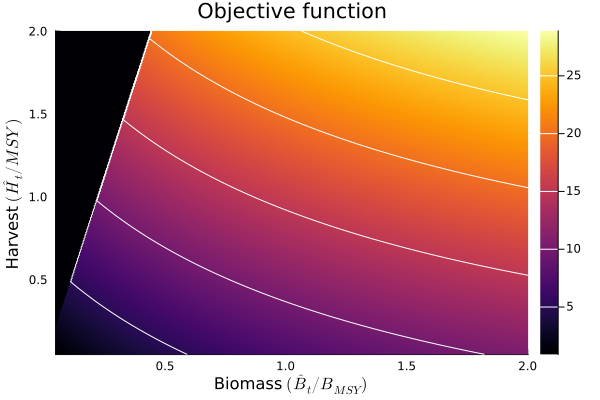

In [6]:
using Plots
using LaTeXStrings
include("SurplusProduction.jl")
include("BaseParams.jl")
MSY = BaseParams.MSY
Fmsy = BaseParams.Fmsy
observation = 1.0
NCV_weight = BaseParams.NCV_weight
H_weight = BaseParams.H_weight
c1 = 0.0#BaseParams.c1
c2 = 0.0#BaseParams.c2
b = 2.0#BaseParams.b
monitoring_cost = 0.0

f(x, y) = SurplusProduction.objective_function([log(x*MSY/Fmsy)],observation,y*MSY,H_weight, NCV_weight, c1,c2, b, monitoring_cost,MSY, Fmsy )

x = range(0.05, 2, length=500)
y = range(0.05, 2, length=500)
z = @. f(x', y)
z[(y*MSY)./ (x*MSY/Fmsy)' .> 0.9] .= z[argmin(z)]

heatmap(x, y, z,
xlabel = string("Biomass ", L"(\hat{B}_t/B_{MSY})"), 
ylabel = string("Harvest ", L"(\hat{H_t}/MSY)"),
title = "Objective function")
contour!(x, y, z,color = "white", levels = [25,20,15,10,5,0.0])

In [5]:
BaseParams.b

1.5

# Total value of monitoring 

In [85]:
using Plots
include("SurplusProduction.jl")
include("BaseParams.jl")

Main.BaseParams

In [ ]:
Fmsy = BaseParams.Fmsy
MSY = BaseParams.MSY
model=SurplusProduction.init( 
                BaseParams.Fmsy, # fishing mortaltiy rate at maximum sustainable yield
                BaseParams.pstar, # p-star
                BaseParams.tau, # process noice
                BaseParams.sigma_a, # active monitoring noise
                BaseParams.sigma_p, # passive monitoring noise
                BaseParams.H_weight, # harvets weight
                BaseParams.NCV_weight, # nonconsumptive values weight
                BaseParams.c1, # stock dependent costs 
                BaseParams.c2, # saturating / nonlinear costs
                BaseParams.b, # nonconsumptive values risk aversion 
                BaseParams.discount;
                MSY = BaseParams.MSY,
                monitoring_costs = BaseParams.monitoring_costs,
                N =50,
                CVmax = 1.5)


In [ ]:
model_no_monitoring = SurplusProduction.init( 0.2,0.4,0.0625,0.3,4.0,8.0,8.0,0.25,0.05,1.6, 
                0.055,MSY = BaseParams.MSY,monitoring_costs = BaseParams.monitoring_costs,N =100,
                CVmax = 2.0,Bmax = 4.0,actions = [1])

nothing

In [ ]:
model_no_monitoring_2 = SurplusProduction.init( 0.2,0.4,0.0625,0.3,4.0,8.0,8.0,0.25,0.05,1.6, 
                0.055,MSY = BaseParams.MSY,monitoring_costs = BaseParams.monitoring_costs,N =400,
                CVmax = 2.0,Bmax = 4.0,actions = [1])

nothing

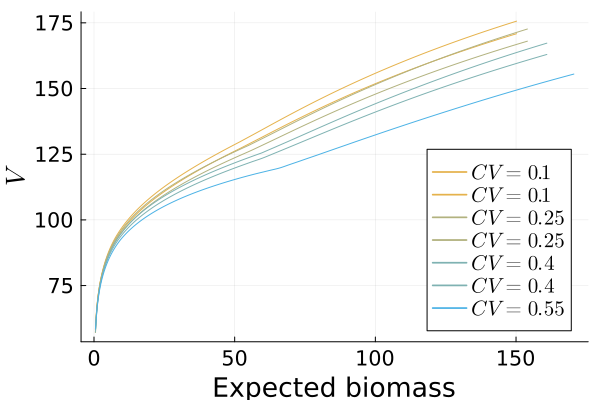

In [139]:
using Colors
using LaTeXStrings
sigma = [log(0.1^2+1), log(0.25^2+1),log(0.4^2+1),log(0.55^2+1), log(1.0^2+1)]


meanNodes = log(0.5):0.005:log(150)
Plots.plot(exp.(meanNodes.+0.5*sigma[1]),broadcast(x->model_no_monitoring.Value([x,sigma[1]]), meanNodes), label = L"CV = 0.1",
            c= Colors.RGB(0.9,0.7,0.3))
Plots.plot!(exp.(meanNodes.+0.5*sigma[1]),broadcast(x->model_no_monitoring_2.Value([x,sigma[1]]), meanNodes), label = L"CV = 0.1",
            c = Colors.RGB(0.9,0.7,0.3))
Plots.plot!(exp.(meanNodes.+0.5*sigma[2]),broadcast(x->model_no_monitoring.Value([x,sigma[2]]), meanNodes), label = L"CV = 0.25",
            c = Colors.RGB(0.7,0.7,0.5))
Plots.plot!(exp.(meanNodes.+0.5*sigma[2]),broadcast(x->model_no_monitoring_2.Value([x,sigma[2]]), meanNodes), label = L"CV = 0.25",
            c = Colors.RGB(0.7,0.7,0.5))
Plots.plot!(exp.(meanNodes.+0.5*sigma[3]),broadcast(x->model_no_monitoring.Value([x,sigma[3]]), meanNodes), label = L"CV = 0.4",
            c = Colors.RGB(0.5,0.7,0.7))
Plots.plot!(exp.(meanNodes.+0.5*sigma[3]),broadcast(x->model_no_monitoring_2.Value([x,sigma[3]]), meanNodes), label = L"CV = 0.4",
            c = Colors.RGB(0.5,0.7,0.7))
Plots.plot!(exp.(meanNodes.+0.5*sigma[4]),broadcast(x->model_no_monitoring.Value([x,sigma[4]]), meanNodes), label = L"CV = 0.55",
            c = Colors.RGB(0.3,0.7,0.9),xlab = "Expected biomass", ylab = L"V", 
            legend = :bottomright,tickfontsize = 14,guidefontsize=18,legendfontsize=14)

In [ ]:
using Colors
using LaTeXStrings
sigma = [log(0.1^2+1), log(0.25^2+1),log(0.4^2+1),log(0.55^2+1), log(1.0^2+1)]


meanNodes = log(0.5):0.005:log(150)
Plots.plot(exp.(meanNodes.+0.5*sigma[1]),broadcast(x->model_no_monitoring.Value([x,sigma[1]]), meanNodes), label = L"CV = 0.1",
            c = Colors.RGB(0.9,0.7,0.3))
Plots.plot!(exp.(meanNodes.+0.5*sigma[2]),broadcast(x->model_no_monitoring.Value([x,sigma[2]]), meanNodes), label = L"CV = 0.25",
            c = Colors.RGB(0.7,0.7,0.5))
Plots.plot!(exp.(meanNodes.+0.5*sigma[3]),broadcast(x->model_no_monitoring.Value([x,sigma[3]]), meanNodes), label = L"CV = 0.4",
            c = Colors.RGB(0.5,0.7,0.7))
Plots.plot!(exp.(meanNodes.+0.5*sigma[4]),broadcast(x->model_no_monitoring.Value([x,sigma[4]]), meanNodes), label = L"CV = 0.55",
            c = Colors.RGB(0.3,0.7,0.9),xlab = "Expected biomass", ylab = L"V", 
            legend = :bottomright,tickfontsize = 14,guidefontsize=18,legendfontsize=14)

In [ ]:
1        Fmsy 0.19375000
2       pstar 0.39375000
3         tau 0.06484375
4     sigma_a 0.33750000
5     sigma_p 1.93750000
6    H_weight 6.68750000
7  NCV_weight 7.56250000
8          c1 0.29687500
9          c2 0.05937500
10          b 1.62500000
11   discount 0.06343750

In [7]:
model.Value([0.0,0.1]) - model_no_monitoring.Value([0.0,0.1])

10.445655427415488

In [64]:
N = 50
total_value = zeros(N,N)
MSY = BaseParams.MSY
Fmsy = BaseParams.Fmsy
Bmin = 0.05*MSY/Fmsy
Bmax = 2.0*MSY/Fmsy
Bhat = 0.0:((2.0)/(N-1)):2.0
CV = 0.0:(2/(N-1)):2.0
length(CV)

50

In [65]:

for i in 1:N
    for j in 1:N
        mu = log(Bhat[i]*MSY/Fmsy)
        sigma = log(CV[j]^2+1)
        total_value[i,j] = model.Value([mu,sigma]) - model_no_monitoring.Value([mu,sigma])
    end
end 


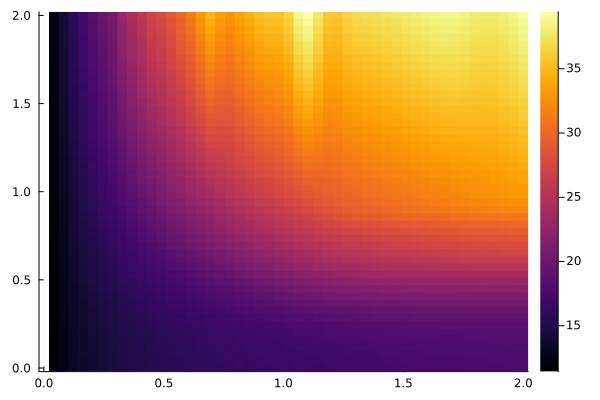

In [66]:
using Plots
Plots.heatmap(Bhat,CV,transpose(total_value))

In [23]:
model.Value.grid

2500-element Vector{AbstractVector{Float64}}:
 [0.9531795264152945, 0.006931471805599453]
 [1.0269571154975732, 0.006931471805599453]
 [1.100734704579852, 0.006931471805599453]
 [1.1745122936621306, 0.006931471805599453]
 [1.2482898827444093, 0.006931471805599453]
 [1.322067471826688, 0.006931471805599453]
 [1.3958450609089668, 0.006931471805599453]
 [1.4696226499912455, 0.006931471805599453]
 [1.5434002390735244, 0.006931471805599453]
 [1.6171778281558031, 0.006931471805599453]
 [1.6909554172380816, 0.006931471805599453]
 [1.7647330063203606, 0.006931471805599453]
 [1.8385105954026393, 0.006931471805599453]
 ⋮
 [3.7567279115418866, 0.6862157087543458]
 [3.8305055006241653, 0.6862157087543458]
 [3.904283089706444, 0.6862157087543458]
 [3.9780606787887223, 0.6862157087543458]
 [4.051838267871002, 0.6862157087543458]
 [4.12561585695328, 0.6862157087543458]
 [4.199393446035559, 0.6862157087543458]
 [4.273171035117837, 0.6862157087543458]
 [4.346948624200117, 0.6862157087543458]
 [4.420726

# Simpler model 

In [ ]:
using Plots
include("SurplusProduction.jl")
include("BaseParams.jl")
Fmsy = BaseParams.Fmsy
MSY = BaseParams.MSY
model=SurplusProduction.init_simpler( 
                BaseParams.Fmsy, # fishing mortaltiy rate at maximum sustainable yield
                BaseParams.pstar, # p-star
                BaseParams.tau, # process noice
                BaseParams.sigma_a, # active monitoring noise
                BaseParams.sigma_p, # passive monitoring noise
                BaseParams.H_weight, # harvets weight
                BaseParams.NCV_weight, # nonconsumptive values weight
                BaseParams.c1, # stock dependent costs 
                BaseParams.c2, # saturating / nonlinear costs
                BaseParams.b, # nonconsumptive values risk aversion 
                BaseParams.discount;
                MSY = BaseParams.MSY,
                monitoring_costs = BaseParams.monitoring_costs,
                N =100,CVmax = 1.0,Bmax = 3.0,actions = [1,2],
                threashold = 10^-5.5,
                Bmin_constraint = 0.05)

print(" ")

interation: 1  convergence: 100000
interation: 2  convergence: 419755.95033283
interation: 3  convergence: 397826.7385608463
interation: 4  convergence: 394139.497340068
interation: 5  convergence: 398348.5940773187
interation: 6  convergence: 390641.52663570695
interation: 7  convergence: 380778.4870125357
interation: 8  convergence: 378331.7966198994
interation: 9  convergence: 376004.16625685
interation: 10  convergence: 362924.2539879398
interation: 11  convergence: 347942.9166584809
interation: 12  convergence: 329072.1029117344
interation: 13  convergence: 318061.2899743611
interation: 14  convergence: 292092.97630333796
interation: 15  convergence: 273677.0506657533
interation: 16  convergence: 253939.79331918736
interation: 17  convergence: 250414.49950937007
interation: 18  convergence: 230942.5891679836
interation: 19  convergence: 212545.27721689618
interation: 20  convergence: 194397.44030736355
interation: 21  convergence: 176330.31946526867
interation: 22  convergence: 16

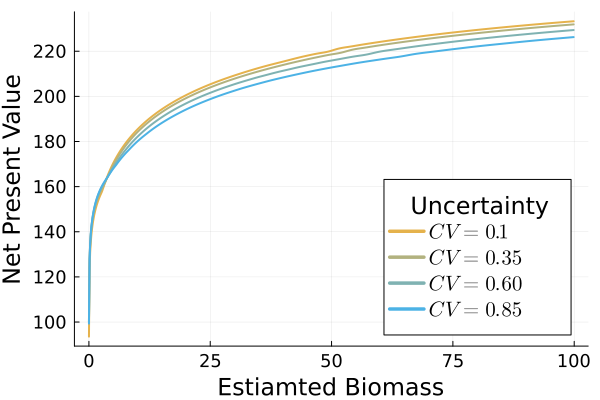

In [ ]:
using Colors
using LaTeXStrings
Bhat = (0.01:(0.00125*2*BaseParams.MSY/BaseParams.Fmsy):(2*BaseParams.MSY/BaseParams.Fmsy))
CV = [0.1,0.35,0.6,0.85]
acc = zeros(length(Bhat),length(CV));n=0
for i in 1:length(Bhat)
    for j in 1:length(CV)
        n+=1;Var = log(CV[j]^2+1);mu = log(Bhat[i]) .- 0.5*Var 
        acc[i,j] = model.Value([mu,Var])
    end
end 

plt=Plots.plot(Bhat,acc[:,1],label = L"CV = 0.1",c = Colors.RGB(0.9,0.7,0.3), width = 2)
Plots.plot!(Bhat,acc[:,2],label = L"CV = 0.35",c = Colors.RGB(0.7,0.7,0.5), width = 2)
Plots.plot!(Bhat,acc[:,3],label = L"CV = 0.60",c = Colors.RGB(0.5,0.7,0.7), width = 2)
Plots.plot!(Bhat,acc[:,4],label = L"CV = 0.85",c = Colors.RGB(0.3,0.7,0.9), width = 2,
            ylabel = "Net Present Value", xlabel = "Estiamted Biomass",legendtitle = "Uncertainty",
            legendfontsize = 14,legendtitlefontsize = 16, legendposition = :bottomright,
            labelfontsize = 16, tickfontsize = 12)

plt

# Simulation plots

In [ ]:
using Random, Plots, Distributions
include("SurplusProduction.jl")
include("surplus_production_VoI.jl")
include("../src/BeliefStateTransitions.jl")
include("BaseParams.jl")

Random.seed!(1234)
MSY = BaseParams.MSY
Fmsy = BaseParams.Fmsy
model=SurplusProduction.init( 
            BaseParams.Fmsy, # fishing mortaltiy rate at maximum sustainable yield
            BaseParams.pstar, # p-star
            BaseParams.tau, # process noice
            BaseParams.sigma_a, # active monitoring noise
            BaseParams.sigma_p, # passive monitoring noise
            BaseParams.H_weight, # harvets weight
            BaseParams.NCV_weight, # nonconsumptive values weight
            BaseParams.c1, # stock dependent costs 
            BaseParams.c2, # saturating / nonlinear costs
            BaseParams.b, # nonconsumptive values risk aversion 
            BaseParams.discount;
            MSY = BaseParams.MSY,
            monitoring_costs = BaseParams.monitoring_costs,
            N =30)

policy =  s -> model.Policy([s[1][1],s[2][1,1]])

# initial conditions for simulation  
B0 = MSY/Fmsy
sigma0 = 0.25

# lenth of simualtion 
T = 50

# numer fo particle sin beleif state aproximation 
number_of_particles = 1000

filter = BeliefStateTransitions.ParticleFilters.init(number_of_particles,Distributions.MvNormal([log(B0)],[sigma0;;]))
x0 = [rand(Distributions.Normal(log(B0), sqrt(sigma0)))]
s0 = ([log(B0)],[sigma0;;])

dat = BeliefStateTransitions.simulation(x0,s0,T,filter,policy,model.mod,model.Returns)
nothing

In [ ]:
dat

In [44]:
using LaTeXStrings
p1 = Plots.scatter(broadcast(i -> exp(dat[1][i][1]), 1:T), markersize= 3, label = string("true biomass: ",L"B_t"),c=3)
Plots.plot!(broadcast(i -> exp.(dat[2][i][1][1]), 1:T), color = "black", label = string("estimated biomass: ",L"\hat{B}_t"))
Plots.plot!(broadcast(i -> exp.(dat[2][i][1][1] + 2*sqrt(dat[2][i][2][1])), 1:T), 
            fillrange = broadcast(i -> exp.(dat[2][i][1][1] - 2*sqrt(dat[2][i][2][1])), 1:T), 
            alpha =0.2, color = "grey", label = string("credible interval ", L"(2\sigma)") , ylab = "")
Plots.plot!(broadcast(i -> exp.(dat[2][i][1][1]- 2*sqrt(dat[2][i][2][1])), 1:T), color = "grey",
            alpha = 0.2, label = "")
inds = collect(1:T)[broadcast(i -> dat[3][i], 1:T) .== 2]
y = zeros(length(inds))
inds_0 = collect(1:T)[broadcast(i -> dat[3][i], 1:T) .== 1]
y_0 = zeros(length(inds))
Plots.plot!(broadcast(i -> dat[4][i], 1:T), color = "black", label = string("harvest: ", L"H_t"), 
xlabel = "Time",linestyle = :dash)
Plots.scatter!(inds,y,markershape = :utriangle, color = "black",markersize = 4,
                label = string("monioring: ", L"\sigma = \sigma_{1}"))
Plots.scatter!(inds_0,y_0,markershape = :utriangle, color = "white",markersize = 4,
                label = string("not monioring: ", L"\sigma = \sigma_{0}"),
                xtickfontsize=12, ytickfontsize=12, guidefont=18, legendfont=12,
                ylims = (-5.0,225.0),legend = false)

plot(p1,size = (2*338,2*326))
savefig("~/github/KalmanFilterPOMDPs/examples/figures/example_simulation_square.png")

"/Users/johnbuckner/github/KalmanFilterPOMDPs/examples/figures/example_simulation_square.png"

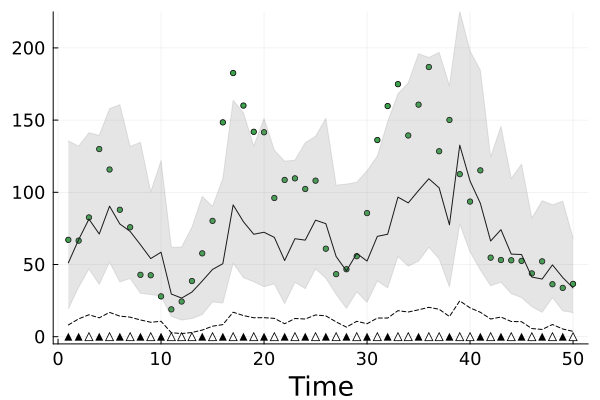

In [43]:
p1

In [6]:
10/0.175

57.142857142857146

# Assessment frequency $p^* - \sigma$

In [339]:
using Plots
include("SurplusProduction.jl")
include("BaseParams.jl")

Fmsy = BaseParams.Fmsy
MSY = BaseParams.MSY
model = SurplusProduction.init_pstar( 
            BaseParams.Fmsy, # fishing mortaltiy rate at maximum sustainable yield
            0.4,#BaseParams.pstar, # p-star
            BaseParams.tau, # process noise
            BaseParams.sigma_a, # active monitoring noise
            BaseParams.sigma_p, # passive monitoring noise
            BaseParams.H_weight, # harvets weight
            BaseParams.NCV_weight, # nonconsumptive values weight
            BaseParams.c1, # stock dependent costs 
            BaseParams.c2, # saturating / nonlinear costs
            BaseParams.b, # nonconsumptive values risk aversion 
            BaseParams.discount;
            MSY = 10,
            N = 50, # number of node
            CVmax = 1.0, # maximum uncertinaty
            Bmax = 3.0, # maximum biomass 
            Bmin = 0.05,
            Blimit = 0.25,
            Btarget = 1.0)


print(" ")

[1.4399999999999997, 109.9999999999998, -0.025]


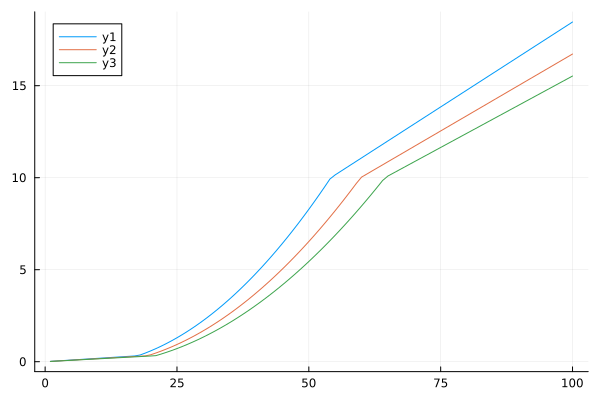

In [340]:
x = 1.0:100.0
Plots.plot(x, broadcast( x -> model.mod.fixed_control(([log(x)],[0.1;;])), x))
Plots.plot!(x, broadcast( x -> model.mod.fixed_control(([log(x)],[0.5;;])), x))
Plots.plot!(x, broadcast( x -> model.mod.fixed_control(([log(x)],[1.0;;])), x))

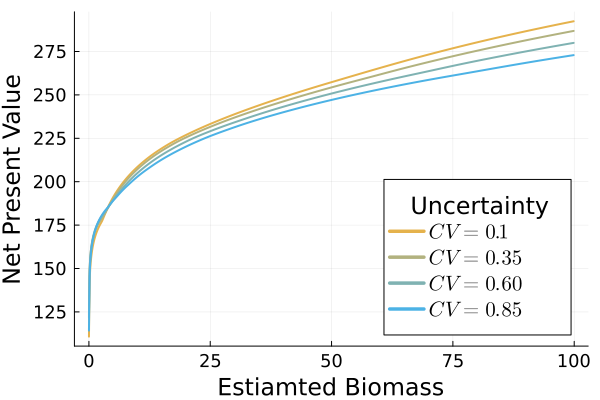

In [341]:
using Colors
using LaTeXStrings
Bhat = (0.01:(0.00125*2*BaseParams.MSY/BaseParams.Fmsy):(2*BaseParams.MSY/BaseParams.Fmsy))
CV = [0.1,0.35,0.6,0.85]
acc = zeros(length(Bhat),length(CV));n=0
for i in 1:length(Bhat)
    for j in 1:length(CV)
        n+=1;Var = log(CV[j]^2+1);mu = log(Bhat[i]) .- 0.5*Var 
        acc[i,j] = model.Value([mu,Var])
    end
end 

plt=Plots.plot(Bhat,acc[:,1],label = L"CV = 0.1",c = Colors.RGB(0.9,0.7,0.3), width = 2)
Plots.plot!(Bhat,acc[:,2],label = L"CV = 0.35",c = Colors.RGB(0.7,0.7,0.5), width = 2)
Plots.plot!(Bhat,acc[:,3],label = L"CV = 0.60",c = Colors.RGB(0.5,0.7,0.7), width = 2)
Plots.plot!(Bhat,acc[:,4],label = L"CV = 0.85",c = Colors.RGB(0.3,0.7,0.9), width = 2,
            ylabel = "Net Present Value", xlabel = "Estiamted Biomass",legendtitle = "Uncertainty",
            legendfontsize = 14,legendtitlefontsize = 16, legendposition = :bottomright,
            labelfontsize = 16, tickfontsize = 12)

plt

In [342]:
using Distributions
include("../src/BeliefStateTransitions.jl")
policy =  s -> model.Policy([s[1][1],s[2][1,1]])

# initial conditions for simulation  
B0 = MSY/Fmsy
sigma0 = 0.25

# lenth of simualtion 
T = 50

# numer fo particle sin beleif state aproximation 
number_of_particles = 1000

filter = BeliefStateTransitions.ParticleFilters.init(number_of_particles,Distributions.MvNormal([log(B0)],[sigma0;;]))
x0 = [rand(Distributions.Normal(log(B0), sqrt(sigma0)))]
s0 = ([log(B0)],[sigma0;;])

dat = BeliefStateTransitions.simulation(x0,s0,T,filter,policy,model.mod,model.Returns)
nothing

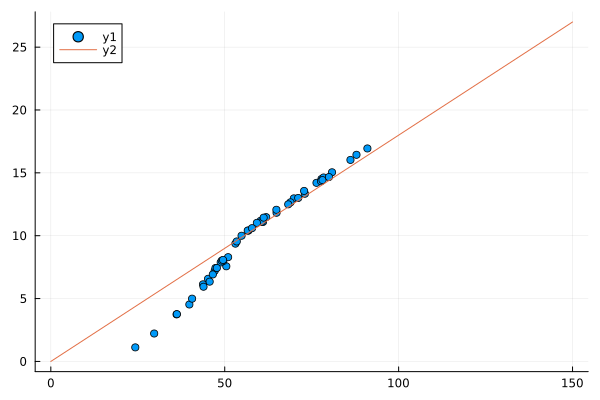

In [343]:
Plots.scatter(broadcast(i -> exp.(dat[2][i][1][1]), 1:T),broadcast(i -> dat[4][i], 1:T))
Plots.plot!([0,150],[0.0,0.18*150])

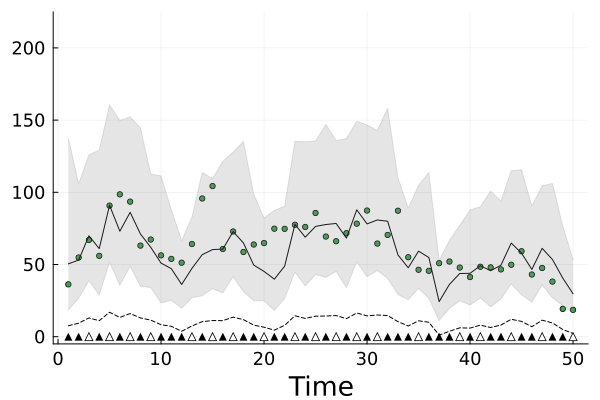

In [344]:

using LaTeXStrings
p1 = Plots.scatter(broadcast(i -> exp(dat[1][i][1]), 1:T), markersize= 3, label = string("true biomass: ",L"B_t"),c=3)
Plots.plot!(broadcast(i -> exp.(dat[2][i][1][1]), 1:T), color = "black", label = string("estimated biomass: ",L"\hat{B}_t"))
Plots.plot!(broadcast(i -> exp.(dat[2][i][1][1] + 2*sqrt(dat[2][i][2][1])), 1:T), 
            fillrange = broadcast(i -> exp.(dat[2][i][1][1] - 2*sqrt(dat[2][i][2][1])), 1:T), 
            alpha =0.2, color = "grey", label = string("credible interval ", L"(2\sigma)") , ylab = "")
Plots.plot!(broadcast(i -> exp.(dat[2][i][1][1]- 2*sqrt(dat[2][i][2][1])), 1:T), color = "grey",
            alpha = 0.2, label = "")
inds = collect(1:T)[broadcast(i -> dat[3][i], 1:T) .== 2]
y = zeros(length(inds))
inds_0 = collect(1:T)[broadcast(i -> dat[3][i], 1:T) .== 1]
y_0 = zeros(length(inds))
Plots.plot!(broadcast(i -> dat[4][i], 1:T), color = "black", label = string("harvest: ", L"H_t"), 
xlabel = "Time",linestyle = :dash)
Plots.scatter!(inds,y,markershape = :utriangle, color = "black",markersize = 4,
                label = string("monioring: ", L"\sigma = \sigma_{1}"))
Plots.scatter!(inds_0,y_0,markershape = :utriangle, color = "white",markersize = 4,
                label = string("not monioring: ", L"\sigma = \sigma_{0}"),
                xtickfontsize=12, ytickfontsize=12, guidefont=18, legendfont=12,
                ylims = (-5.0,225.0),legend = false)

p1

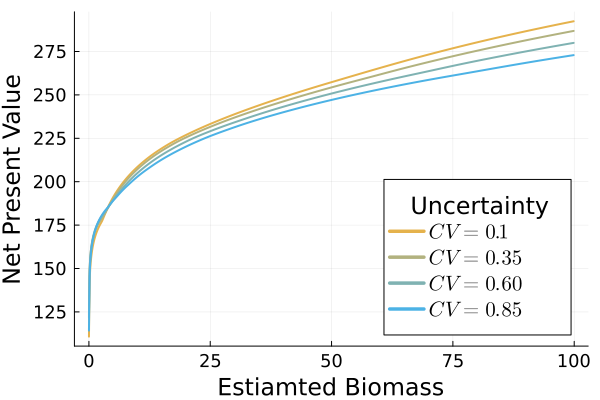

In [345]:
using Colors
using LaTeXStrings
Bhat = (0.01:(0.00125*2*BaseParams.MSY/BaseParams.Fmsy):(2*BaseParams.MSY/BaseParams.Fmsy))
CV = [0.1,0.35,0.6,0.85]
acc = zeros(length(Bhat),length(CV));n=0
for i in 1:length(Bhat)
    for j in 1:length(CV)
        n+=1;Var = log(CV[j]^2+1);mu = log(Bhat[i]) .- 0.5*Var 
        acc[i,j] = model.Value([mu,Var])
    end
end 

plt=Plots.plot(Bhat,acc[:,1],label = L"CV = 0.1",c = Colors.RGB(0.9,0.7,0.3), width = 2)
Plots.plot!(Bhat,acc[:,2],label = L"CV = 0.35",c = Colors.RGB(0.7,0.7,0.5), width = 2)
Plots.plot!(Bhat,acc[:,3],label = L"CV = 0.60",c = Colors.RGB(0.5,0.7,0.7), width = 2)
Plots.plot!(Bhat,acc[:,4],label = L"CV = 0.85",c = Colors.RGB(0.3,0.7,0.9), width = 2,
            ylabel = "Net Present Value", xlabel = "Estiamted Biomass",legendtitle = "Uncertainty",
            legendfontsize = 14,legendtitlefontsize = 16, legendposition = :bottomright,
            labelfontsize = 16, tickfontsize = 12)

plt